In [2]:
# Importando biblioteca Pandas para a criação e manipulação de DataFrames.
import pandas as pd

# Importando o Numpy.
import numpy as np

# Importando o método PLT para visualizar graficamente os dados, cálculos e regressões que aplicarmos.
import matplotlib.pylab as plt

# Importando modelos para a realização dos testes de treino.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Importando métricas de avaliações para os modelos.
from sklearn.metrics import confusion_matrix, f1_score, auc, roc_auc_score, roc_curve

# Importando o método de validação cruzada K-Fold, pontuação do modelo e o separador de dados para treino e teste.
from sklearn.model_selection import KFold, cross_val_score,train_test_split

In [7]:
# Importando dataset de dados de treino da vetorização TF:
dados_treino_tf = pd.read_csv("tweets_vetorizados_tf_agrupados.csv", sep=",", header=None)
dados_treino_tf.head()

# Separação dos dados:
dados_treino_tf.columns = [dados_treino_tf.loc[0]]
dados_treino_tf = dados_treino_tf.drop(dados_treino_tf.index [[0]])



C:\Users\luqui\AppData\Local\Temp\ipykernel_2260\2671578489.py:2: DtypeWarning: Columns (9,10,14,23,24,25,26,27,37,40,42,46,49,56,57,58,59,60,61,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,30

In [8]:
# Importando dataset de dados de treino da vetorização IDF:
dados_treino_idf = pd.read_csv("tweets_vetorizados_idf_agrupados.csv", sep=",", header=None)
dados_treino_idf.head()

# Separação dos dados:
dados_treino_idf.columns = [dados_treino_idf.loc[0]]
dados_treino_idf = dados_treino_idf.drop(dados_treino_idf.index [[0]])

C:\Users\luqui\AppData\Local\Temp\ipykernel_2260\3723810428.py:2: DtypeWarning: Columns (9,10,14,23,24,25,26,27,37,40,42,46,49,56,57,58,59,60,61,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,30

In [9]:
# Importando dataset de dados de treino da vetorização TF_IDF:
dados_treino_tf_idf = pd.read_csv("tweets_vetorizados_tf_idf_agrupados.csv", sep=",", header=None)
dados_treino_tf_idf.head()

# Separação dos dados:
dados_treino_tf_idf.columns = [dados_treino_tf_idf.loc[0]]
dados_treino_tf_idf = dados_treino_tf_idf.drop(dados_treino_tf_idf.index [[0]])

C:\Users\luqui\AppData\Local\Temp\ipykernel_2260\3543103098.py:2: DtypeWarning: Columns (9,10,14,23,24,25,26,27,37,40,42,46,49,56,57,58,59,60,61,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,30

## Modelo de Regressão Logística (Logistic Regression)

### TF

In [10]:
# Separação dos dados:
#dados_treino_tf.columns = [dados_treino_tf.loc[0]]
#dados_treino_tf = dados_treino_tf.drop(dados_treino_tf.index [[0]])

X = dados_treino_tf.drop(['Cluster'], axis=1).values
y = dados_treino_tf['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
model = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
model.fit(X_train, y_train)
lr_pred = model.predict(X)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', lr_pred)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Resultados do modelo:
 [0.6        0.93333333 0.93333333 0.6        0.93333333 0.8
 0.8        0.73333333 0.6        0.6       ]

Média dos resultados: 0.7533333333333332

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positiv

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[164,   1,   3],
       [  0,  44,   3],
       [  7,   1, 277]], dtype=int64)

In [13]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9761904761904762 

Precisão (Precision):  0.9590643274853801 

Especificidade (Specificity):  0.9361702127659575 

F1 Macro:  0.9630467647449068 

F1 Micro:  0.97


### IDF

In [14]:
#teste = dados_treino_idf.replace(np.nan, 0)
#teste.head(30)

In [15]:
dados_treino_idf = dados_treino_idf.replace(np.nan, 0)

X = dados_treino_idf.drop(['Cluster'], axis=1).values
y = dados_treino_idf['Cluster'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
model = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
model.fit(X_train, y_train)
lr_pred = model.predict(X)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', lr_pred)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Resultados do modelo:
 [0.46666667 0.73333333 0.73333333 0.66666667 0.8        0.66666667
 0.6        0.66666667 0.6        0.6       ]

Média dos resultados: 0.6533333333333332

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'neutral' 'positive'
 

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[157,   1,  10],
       [  3,  41,   3],
       [  8,   0, 277]], dtype=int64)

In [18]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9345238095238095 

Precisão (Precision):  0.9345238095238095 

Especificidade (Specificity):  0.8723404255319149 

F1 Macro:  0.9397834616667055 

F1 Micro:  0.9500000000000001


### TF-IDF

In [19]:
X = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
y = dados_treino_tf_idf['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
model = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
model.fit(X_train, y_train)
lr_pred = model.predict(X)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', lr_pred)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Resultados do modelo:
 [0.6        0.8        0.66666667 0.73333333 0.86666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]

Média dos resultados: 0.7

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positive' 'pos

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[163,   0,   5],
       [  1,  39,   7],
       [  6,   0, 279]], dtype=int64)

In [22]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9702380952380952 

Precisão (Precision):  0.9588235294117647 

Especificidade (Specificity):  0.8297872340425532 

F1 Macro:  0.9467412618687217 

F1 Micro:  0.962


## Modelo Naive Bayes

### TF

In [23]:
# Separação dos dados para teste e treino:
X = dados_treino_idf.drop(['Cluster'], axis=1).values
y = dados_treino_idf['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Criação e treino do modelo Naive Bayes:
model = MultinomialNB(alpha=0.01, fit_prior=True)
model.fit(X_train, y_train)
nb_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', nb_pred)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Resultados do modelo:
 [0.26666667 0.73333333 0.53333333 0.53333333 0.6        0.4
 0.46666667 0.46666667 0.46666667 0.33333333]

Média dos resultados: 0.48

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'neutral' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'neutral' 'neutral' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positive' 'positive' 'p

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[158,   4,   6],
       [  2,  41,   4],
       [ 22,  13, 250]], dtype=int64)

In [25]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9404761904761905 

Precisão (Precision):  0.8681318681318682 

Especificidade (Specificity):  0.8723404255319149 

F1 Macro:  0.867080238823358 

F1 Micro:  0.898


### IDF

In [26]:
dados_treino_idf = dados_treino_idf.replace(np.nan, 0)

# Separação dos dados para teste e treino:
X = dados_treino_idf.drop(['Cluster'], axis=1).values
y = dados_treino_idf['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Criação e treino do modelo Naive Bayes:
model = MultinomialNB(alpha=0.01, fit_prior=True)
model.fit(X_train, y_train)
nb_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', nb_pred)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Resultados do modelo:
 [0.26666667 0.73333333 0.53333333 0.53333333 0.6        0.4
 0.46666667 0.46666667 0.46666667 0.33333333]

Média dos resultados: 0.48

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'neutral' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'neutral' 'neutral' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positive' 'positive' 'p

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[158,   4,   6],
       [  2,  41,   4],
       [ 22,  13, 250]], dtype=int64)

In [28]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9404761904761905 

Precisão (Precision):  0.8681318681318682 

Especificidade (Specificity):  0.8723404255319149 

F1 Macro:  0.867080238823358 

F1 Micro:  0.898


### TF-IDF

In [29]:
# Separação dos dados para teste e treino:
X = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
y = dados_treino_tf_idf['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Criação e treino do modelo Naive Bayes:
model = MultinomialNB(alpha=0.01, fit_prior=True)
model.fit(X_train, y_train)
nb_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', nb_pred)

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Resultados do modelo:
 [0.26666667 0.73333333 0.6        0.53333333 0.53333333 0.46666667
 0.53333333 0.46666667 0.4        0.4       ]

Média dos resultados: 0.49333333333333335

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'neutral' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'neutral' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'neutral' 'positive'
 '

c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luqui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[158,   3,   7],
       [  2,  41,   4],
       [ 21,  14, 250]], dtype=int64)

In [31]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9404761904761905 

Precisão (Precision):  0.8729281767955801 

Especificidade (Specificity):  0.8723404255319149 

F1 Macro:  0.867382474259265 

F1 Micro:  0.898


Quantidade de Palavras: 84044


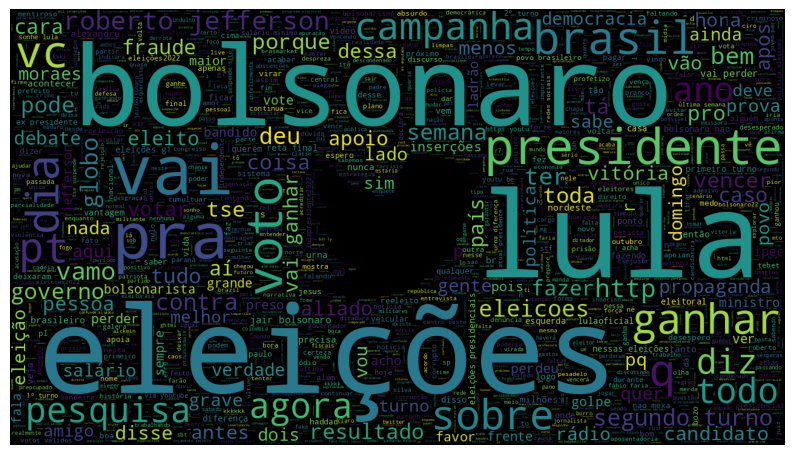

In [4]:
# importar os pacotes necessários
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
import DataFrame

# criar dataframe de tweets
tweets = DataFrame.cria_df()

# concatenar as palavras
palavras = " ".join(s for s in tweets)

# criar array de rgb da imagem da logo do twiteer
twitter_mask = np.array(Image.open("twitterescuro.jpeg"))

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(palavras)))

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords.words('portuguese'),
                      background_color="black",
                      width=1000, 
                      height=1000, 
                      max_words=2000,
                      mask=twitter_mask, 
                      max_font_size=200,
                      min_font_size=1).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("wordcloud_tweets.png")

In [8]:
dataframe = pd.read_csv("tweets_texto_agrupados.csv").sample(n = 3);

dataframe

,Unnamed: 0,Tweets,Cluster
77,77,Cidades onde Lula e Bolsonaro empataram no 1º ...,neutral
151,151,Essas eleições não tem mais legitimidade. \nA ...,positive
485,485,As pessoas que apoiam o Lula também são corrup...,negative
